In [ ]:
# TensorFlow Datasets
# Createing preprocessing function for our data
# Setting up mixed precision training (faster model training)
!nvidia-smi -L
# print(tf.__version__)

GPU 0: Tesla T4 (UUID: GPU-7e3b6644-4131-03ce-e603-cfde415474d7)


In [ ]:
import tensorflow as tf
tf.__version__

'2.6.2'

In [ ]:
!pip install tensorflow==2.6.2

 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 458.4 MB 34 kB/s 
     |████████████████████████████████| 14.9 MB 62.4 MB/s 
     |████████████████████████████████| 5.6 MB 73.1 MB/s 
     |████████████████████████████████| 462 kB 69.2 MB/s 
     |████████████████████████████████| 1.3 MB 65.8 MB/s 
     |████████████████████████████████| 132 kB 75.9 MB/s 
     |████████████████████████████████| 152 kB 65.4 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=50b08c0df6b9e1990aa728fec67afe7d6f96400bae083465d92cfb4d85264880
  Stored in directory: /root/.cache/pip/wheels/f1/60/77/22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=0d204dcc94d92dade522f7aa616daddcb707919e264d3aad412b9ffd238944a4
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e78489

AttributeError: ignored

In [ ]:
import

# Milestone Project1: Food Vision Big

## Check GPU

Google colabs offers bunch of GPUs for free but not all GPUs is compatible for mixed precision training

Google Colab offers:
* K80
* P100
* Tesla T4 (this is the only compatible)

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7e3b6644-4131-03ce-e603-cfde415474d7)


## Get Helper Functions

in past modules, we've created a bunch of helper functions to do small tasks required for our notbeooks.

Rahter than rewrite all of these we can import  from: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

In [ ]:
# Download helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-12-25 01:11:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-25 01:11:16 (111 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# Import series of helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow Datasets

Guide of tensorflow datasets: https://www.tensorflow.org/datasets/overview

In [ ]:
# Get TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


In [ ]:
(train_data, test_data), ds_info = tfds.load("food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True, # format in tuppler
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete4LDO0V/food101-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete4LDO0V/food101-validation.tfrecord*...:   0%|         …

Dataset food101 downloaded and prepared to ~/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TensorFlow Datasets

To become one with our data, we want to find:
* Class names
* Shape of our imput data
* Datatype
* What the labels looks like (is it one-hot-code or number)
* Check data visualize

In [ ]:
# Check the info
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
# Get the class names
class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from Food101: {label}
  Class name: {class_names[label.numpy()]}
  """)
  


  Image shape: (512, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from Food101: 43
  Class name: fried_calamari
  


In [ ]:
type(train_one_sample)
print(train_one_sample.element_spec)


(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


In [ ]:
# What does our image tensor from TFDS's Food101 look like?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

In [ ]:
image.numpy()

array([[[71, 60, 56],
        [70, 59, 55],
        [70, 59, 55],
        ...,
        [65, 60, 67],
        [65, 60, 67],
        [64, 59, 66]],

       [[62, 51, 47],
        [64, 53, 49],
        [66, 55, 51],
        ...,
        [65, 60, 67],
        [65, 60, 67],
        [64, 59, 66]],

       [[61, 50, 46],
        [65, 54, 50],
        [68, 57, 53],
        ...,
        [66, 61, 68],
        [65, 60, 67],
        [63, 58, 65]],

       ...,

       [[63, 64, 66],
        [64, 65, 67],
        [67, 67, 69],
        ...,
        [45, 42, 49],
        [45, 42, 49],
        [45, 42, 49]],

       [[64, 64, 66],
        [64, 64, 66],
        [65, 65, 67],
        ...,
        [44, 41, 48],
        [44, 41, 48],
        [44, 41, 48]],

       [[62, 62, 64],
        [62, 62, 64],
        [62, 62, 64],
        ...,
        [43, 40, 47],
        [42, 39, 46],
        [42, 39, 46]]], dtype=uint8)

(-0.5, 511.5, 511.5, -0.5)

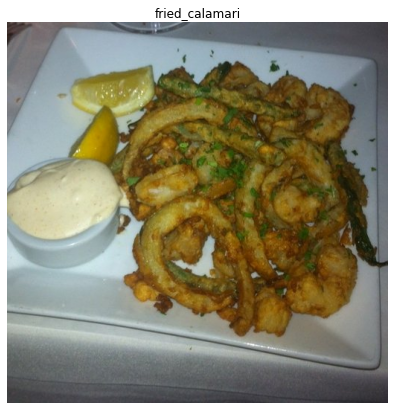

In [ ]:
### Plot an Image from tensorflow datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.imshow(image.numpy())
plt.title(class_names[label.numpy()])
plt.axis(False)



In [ ]:
# tf.keras.preprocessing.image_dataset_from_directory()
train_data

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (batched, normalized, etc).

However, not all data (including data from TensorFlow Datasets)

So in order to get it ready for a neural netwrok, you'll often to write preprocessing fucntions and map it to your data.

what we know:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255

what we know models like:
* Data in `float32`
* For abtches, TnsorFlow like all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) als called normalized tensors generally perform better.

With these points in mind, we've got a few things we can tackel with a preprocessing function.

Since we're going to be using an EfficientNetVX pretrained model from `tf.keras.applications` we don't need to rescale our data (theese architectures have rescaling bulit-in).

This means our functions needs to:
1. Reshape our images to all the same size
2. Convert dtype of our image tensors from `uint8` to `float32`

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from `uint8` -> `float32` and reshapes
  image to [img_shape, img_shape, color_channels]
  """
  image = tf.image.resize(image, size=[img_shape, img_shape]) # reshape target image
  return tf.cast(image, tf.float32), label

In [ ]:
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n{image[:2]}\nShape: {image.shape} \nDataType:{image.dtype}\n\n")
print(f"Image after preprocessing: \n{preprocessed_img[:2]}\nShape: {preprocessed_img.shape}\nDataType:{preprocessed_img.dtype}")

Image before preprocessing:
[[[71 60 56]
  [70 59 55]
  [70 59 55]
  ...
  [65 60 67]
  [65 60 67]
  [64 59 66]]

 [[62 51 47]
  [64 53 49]
  [66 55 51]
  ...
  [65 60 67]
  [65 60 67]
  [64 59 66]]]
Shape: (512, 512, 3) 
DataType:<dtype: 'uint8'>


Image after preprocessing: 
[[[ 65.81122   54.811222  50.811222]
  [ 73.331635  62.331635  58.331635]
  [104.015305  89.80102   86.80102 ]
  ...
  [ 61.85712   59.071384  65.64286 ]
  [ 65.        60.        67.      ]
  [ 64.64282   59.642822  66.64282 ]]

 [[ 67.28571   56.285717  52.285717]
  [ 66.47449   55.47449   51.47449 ]
  [ 67.73979   53.525505  50.525505]
  ...
  [ 64.14284   61.3571    67.92857 ]
  [ 65.93368   60.933674  67.93368 ]
  [ 64.285645  59.285645  66.285645]]]
Shape: (224, 224, 3)
DataType:<dtype: 'float32'>


In [ ]:
image[:2]

<tf.Tensor: shape=(2, 512, 3), dtype=uint8, numpy=
array([[[71, 60, 56],
        [70, 59, 55],
        [70, 59, 55],
        ...,
        [65, 60, 67],
        [65, 60, 67],
        [64, 59, 66]],

       [[62, 51, 47],
        [64, 53, 49],
        [66, 55, 51],
        ...,
        [65, 60, 67],
        [65, 60, 67],
        [64, 59, 66]]], dtype=uint8)>

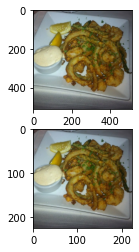

<Figure size 864x504 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

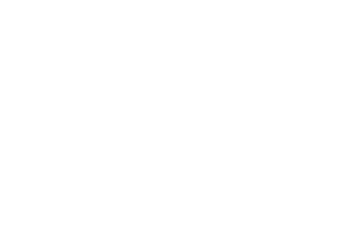

In [ ]:
fig, axs = plt.subplots(2)

plt.figure(figsize=(12,7))
axs[0].imshow(image)
axs[1].imshow(preprocessed_img/255)
plt.show()
# plt.figure(figsize=(12,7))
# plt.imshow(preprocessed_img/255)
# # plt.imshow(image)
plt.axis(False)

## Batch & prepare datasets

In [ ]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle train_data and turn it into batches and prefetch it
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to training (and parallelize)
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Shuffle train_data and turn it into batches and prefetch it


In [ ]:
for image, info in train_data.take(1):
  print("image")
2.19285717e+01

image


21.9285717

# New Section

Preprecessing in above means that tensorflow will do a favor for us to map the preprocessing function accros our training dataset, shuffle the train dataset 1000 each time of shuffle, batch it and prefetch it

## Create Modelling Callbacks

We're going to create a couple of callbacks to help us while our model trains:
* TensorfBoard callback to log training results
* ModelCheckPoint

In [ ]:
from helper_functions import create_tensorboard_callback

checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=0
)

# create_tensorboard_callback()

In [ ]:
# !pip install tensorflow==2.4.0
# tf.__version_
# 

In [ ]:
## Setup mixed precision training
# train_data

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")



In [ ]:
from tensorflow.python.keras.layers import preprocessing
import tensorflow as tf
from tensorflow.keras import layers

INPUT_SHAPE = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=INPUT_SHAPE)

# Rescaling
# x = preprocessing.Rescaling(1./255)(x)


x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)

outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


## Checking layer dtype policies

In [ ]:
for layer in model.layers:
  print(layer.name, layer.dtype, layer.dtype_policy, layer.trainable)

input_2 float32 <Policy "float32"> True
efficientnetb0 float32 <Policy "mixed_float16"> False
global_average_pooling2d float32 <Policy "mixed_float16"> True
dense float32 <Policy "mixed_float16"> True
softmax_float32 float32 <Policy "float32"> True


# Going Through the above we see
* `layer.name` the human readable name of a particular layer
* `layer.trainable`: is the layer tranable or not? (if `False`, the weights are frozen
* `layer.dtype`: the datatype a layer stores variable in 
* `layer.dtype_policy`: the data type policy a layer computes on its variables


In [ ]:
efficientNetB = model.layers[1]
base_model, efficientNetB.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

(<keras.engine.functional.Functional at 0x7f8bded21dc0>, None)

In [ ]:
for layer in base_model.layers:
  print(layer.name, layer.dtype, layer.dtype_policy)

input_1 float32 <Policy "float32">
rescaling float32 <Policy "mixed_float16">
normalization float32 <Policy "mixed_float16">
stem_conv_pad float32 <Policy "mixed_float16">
stem_conv float32 <Policy "mixed_float16">
stem_bn float32 <Policy "mixed_float16">
stem_activation float32 <Policy "mixed_float16">
block1a_dwconv float32 <Policy "mixed_float16">
block1a_bn float32 <Policy "mixed_float16">
block1a_activation float32 <Policy "mixed_float16">
block1a_se_squeeze float32 <Policy "mixed_float16">
block1a_se_reshape float32 <Policy "mixed_float16">
block1a_se_reduce float32 <Policy "mixed_float16">
block1a_se_expand float32 <Policy "mixed_float16">
block1a_se_excite float32 <Policy "mixed_float16">
block1a_project_conv float32 <Policy "mixed_float16">
block1a_project_bn float32 <Policy "mixed_float16">
block2a_expand_conv float32 <Policy "mixed_float16">
block2a_expand_bn float32 <Policy "mixed_float16">
block2a_expand_activation float32 <Policy "mixed_float16">
block2a_dwconv_pad float3

In [ ]:
from numpy.random import seed
seed(42)
tf.random.set_seed(42)
model.layers


In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')
history_101_food_classes_feature_extract = model.fit(train_data,
          epochs=3,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=int(0.15*len(test_data)),
          callbacks=[create_tensorboard_callback(dir_name='tensorboard', experiment_name=model.name),
                     model_checkpoint 
                     ])

Saving TensorBoard log files to: tensorboard/model/20221225-012103
Epoch 1/3


/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


2368/2368 [==============================] - 239s 94ms/step - loss: 1.8190 - accuracy: 0.5568 - val_loss: 1.2222 - val_accuracy: 0.6732
Epoch 2/3
2368/2368 [==============================] - 176s 74ms/step - loss: 1.2913 - accuracy: 0.6667 - val_loss: 1.1298 - val_accuracy: 0.6960
Epoch 3/3
2368/2368 [==============================] - 175s 73ms/step - loss: 1.1416 - accuracy: 0.7019 - val_loss: 1.0937 - val_accuracy: 0.7052


In [ ]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 55s 70ms/step - loss: 1.0867 - accuracy: 0.7064


[1.0866974592208862, 0.7063762545585632]

In [ ]:
train_data

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
import tensorflow as tf
tf.__version__

'2.6.2'

In [ ]:
# Make a clone of our model structure
cloned_model = tf.keras.models.clone_model(model)

In [ ]:
# Import the weight to the cloned model
cloned_model.load_weights(checkpoint_path)

## We need to compile each we load every time

In [ ]:
cloned_model.compile(loss="sparse_categorical_crossentropy",
                     optimizer="adam",
                     metrics=["accuracy"])

In [ ]:
result_cloned_model_with_loaded_weights = cloned_model.evaluate(test_data)

790/790 [==============================] - 52s 63ms/step - loss: 1.7359 - accuracy: 0.5436


In [ ]:
for layer in cloned_model.layers[1].layers[:20]:
  print(layer.name, layer.dtype, layer.dtype_policy)

input_1 float32 <Policy "float32">
rescaling float32 <Policy "mixed_float16">
normalization float32 <Policy "mixed_float16">
stem_conv_pad float32 <Policy "mixed_float16">
stem_conv float32 <Policy "mixed_float16">
stem_bn float32 <Policy "mixed_float16">
stem_activation float32 <Policy "mixed_float16">
block1a_dwconv float32 <Policy "mixed_float16">
block1a_bn float32 <Policy "mixed_float16">
block1a_activation float32 <Policy "mixed_float16">
block1a_se_squeeze float32 <Policy "mixed_float16">
block1a_se_reshape float32 <Policy "mixed_float16">
block1a_se_reduce float32 <Policy "mixed_float16">
block1a_se_expand float32 <Policy "mixed_float16">
block1a_se_excite float32 <Policy "mixed_float16">
block1a_project_conv float32 <Policy "mixed_float16">
block1a_project_bn float32 <Policy "mixed_float16">
block2a_expand_conv float32 <Policy "mixed_float16">
block2a_expand_bn float32 <Policy "mixed_float16">
block2a_expand_activation float32 <Policy "mixed_float16">


In [ ]:
import numpy as np
assert np.isclose(results_feature_extract_model, result_cloned_model_with_loaded_weights).

SyntaxError: ignored

In [ ]:
results_feature_extract_model, result_cloned_model_with_loaded_weights

([1.0866974592208862, 0.7063762545585632],
 [1.73585045337677, 0.5435643792152405])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir /content/gdrive/My\ Drive/Colab_Models 

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab_Models’: File exists


In [ ]:
model_name = "feature_extraction_model_with_efficientNetB0."
save_dir = f"/gdrive/MyDrive/Colab_Models/{model_name}"
# import os
# os.makedirs(save_dir)
model.save(save_dir)

/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
loaded_saved_model = tf.keras.models.load_model(save_dir)

In [ ]:
cloned_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
loaded_saved_model.summary()
# loaded_saved_model.weights

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
import numpy as np
# for i in range(len(loaded_saved_))
# np.isclose(loaded_saved_model.weights[1:20], model.weights[1:20])
len(loaded_saved_model.weights), len(cloned_model.weights), len(model.weights)



(314, 314, 314)

In [ ]:
model_v_cloned_model = 0
model_v_loaded_model = 0
for i in range(len(model.weights)):
  if np.isclose(loaded_saved_model.weights[i], model.weights[i]).any():
    model_v_loaded_model+=1
  if np.isclose(cloned_model.weights[i], model.weights[i]).any():
    model_v_cloned_model+=1
model_v_cloned_model, model_v_loaded_model

(314, 314)

In [ ]:
for layer in loaded_saved_model.layers[1].layers[:20]:
  print(layer.name, layer.dtype, layer.dtype_policy)

In [ ]:
loaded_saved_model.evaluate(test_data)

790/790 [==============================] - 54s 66ms/step - loss: 1.0867 - accuracy: 0.7064


[1.0866975784301758, 0.7063762545585632]

In [ ]:
for layer in loaded_saved_model.layers:
  layer.trainable = True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


## Let's make early stopping calllback.

Because due to the nature of machine learning, it can stopped learning

So we use `EarlyStopping` Callback

In [ ]:
# Setup earlystopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

# Create model checkpoint callback
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_loss",
                                                      save_best_only=True)

### Reduce the learning rate

Like when we want to get the coint, we slow down our hands because we dont want the coint going away 

So we use `ReduceLROnPlateau` callback

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                factor=0.2,
                                                patience=2,
                                                verbose=1,
                                                min_lr=1e-7)

In [ ]:
# Compile the model
loaded_saved_model.compile(loss="sparse_categorical_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(0.0001),
                           metrics=['accuracy'])

In [ ]:
len(train_data)

2368

In [ ]:
history_101_food_classes_all_data_fine_tune = loaded_saved_model.fit(train_data,
                                                                     epochs=100,
                                                                     steps_per_epoch=len(train_data),
                                                                     validation_data=test_data,
                                                                     validation_steps=int(0.15*len(test_data)),
                                                                     callbacks=[create_tensorboard_callback(dir_name="Tensorboard", experiment_name="Fine-Tuning-EfficientNetB0"),
                                                                                model_checkpoint,
                                                                                early_stopping,
                                                                                reduce_lr]
                                                                     )

Saving TensorBoard log files to: Tensorboard/Fine-Tuning-EfficientNetB0/20221225-020359


/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
2368/2368 [==============================] - 349s 141ms/step - loss: 0.9219 - accuracy: 0.7521 - val_loss: 0.8032 - val_accuracy: 0.7770


/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
2368/2368 [==============================] - 332s 139ms/step - loss: 0.5815 - accuracy: 0.8393 - val_loss: 0.7717 - val_accuracy: 0.7868


/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/100
2368/2368 [==============================] - 320s 134ms/step - loss: 0.3279 - accuracy: 0.9064 - val_loss: 0.8509 - val_accuracy: 0.7865
Epoch 4/100
2368/2368 [==============================] - 325s 136ms/step - loss: 0.1761 - accuracy: 0.9477 - val_loss: 0.9580 - val_accuracy: 0.7844

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 5/100
2368/2368 [==============================] - 318s 133ms/step - loss: 0.0364 - accuracy: 0.9918 - val_loss: 1.0143 - val_accuracy: 0.8019


In [ ]:
model_name = "feature_extraction_model_with_efficientNetB0."
save_dir = f"/content/gdrive/MyDrive/Colab_Models/{model_name}"
# import os
# os.makedirs(save_dir)
model.save(save_dir)

/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
model_name = "fine_tuning_model_with_efficientNetB0."
save_dir = f"/content/gdrive/MyDrive/Colab_Models/{model_name}"
# import os
# os.makedirs(save_dir)
loaded_saved_model.save(save_dir)

/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
model_name_fine_tuning = "fine_tuning_model_with_efficientNetB0."
save_dir_fine_tuning = f"/content/gdrive/MyDrive/Colab_Models/{model_name_fine_tuning}"
fine_tuning_loaded = tf.keras.models.load_model(save_dir_fine_tuning)


In [ ]:
fine_tuning_loaded.evaluate(test_data)

790/790 [==============================] - 73s 89ms/step - loss: 1.0308 - accuracy: 0.7996


[1.030799388885498, 0.7996039390563965]

In [ ]:
model_name_feature_extraction = "feature_extraction_model_with_efficientNetB0."
save_dir = f"/content/gdrive/MyDrive/Colab_Models/{model_name_feature_extraction}"
feature_extraction_loaded = tf.keras.models.load_model(save_dir)

In [ ]:
feature_extraction_loaded.evaluate(test_data)

790/790 [==============================] - 56s 69ms/step - loss: 1.0867 - accuracy: 0.7064


[1.0866975784301758, 0.7063762545585632]

In [ ]:
a = test_data.take(1)
for image, label in a:
  image1 =image
  label=label
image1[1]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[204.87245, 188.64285, 166.33163],
        [206.33163, 190.33163, 167.33163],
        [204.20409, 189.20409, 166.20409],
        ...,
        [202.71938, 181.71938, 160.99486],
        [199.78574, 179.78574, 154.64285],
        [200.92847, 181.51523, 152.75496]],

       [[205.95409, 188.95409, 170.86224],
        [204.13776, 187.13776, 167.2704 ],
        [204.19897, 189.19897, 168.19897],
        ...,
        [203.     , 182.     , 162.88776],
        [202.07144, 182.07144, 157.92346],
        [201.92346, 181.92346, 156.11728]],

       [[205.14287, 187.64796, 172.79082],
        [204.     , 186.9847 , 171.0153 ],
        [204.59694, 189.59694, 170.59694],
        ...,
        [202.12244, 181.12244, 162.88771],
        [202.52548, 181.52548, 162.81117],
        [202.28578, 181.56642, 160.     ]],

       ...,

       [[208.13774, 192.13774, 176.13774],
        [207.62749, 194.19896, 176.77043],
        [207.16833, 193.831

In [ ]:
len(feature_extraction_loaded.predict(image1)[1])

101

In [ ]:
len(label)

32

In [ ]:
np.argmax(feature_extraction_loaded.predict(image1)[1])

73

In [ ]:
label[1]

<tf.Tensor: shape=(), dtype=int64, numpy=73>